To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 2 - KNN hyperparameter tuning using cross validation

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from pandas.core.tools.datetimes import YearMonthDayDict
from pandas.tseries.offsets import YearBegin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
np.random.seed(400)

## 2.1

In [3]:

# Load the data
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Social_Network_Ads.csv')
#data = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))
data.head()
#data = pd.read_csv('Social_Network_Ads.csv')

X = data[['Age','EstimatedSalary']]
Y= data['Purchased']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform both the training and testing set
X_scaled = scaler.fit_transform(X)

#Test train split for the data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=400)
# KNN classifier with K=4 and p=2 (Euclidean)
knn_classifier = KNeighborsClassifier(n_neighbors=4, p=2)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Predict the target values for the test set
Y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier's performance using various metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F-1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


Saving Social_Network_Ads.csv to Social_Network_Ads.csv
Accuracy: 0.9
Precision: 0.8260869565217391
Recall: 0.8260869565217391
F-1 Score: 0.8260869565217391
Confusion Matrix:
[[53  4]
 [ 4 19]]


**Answer:**

## 2.2

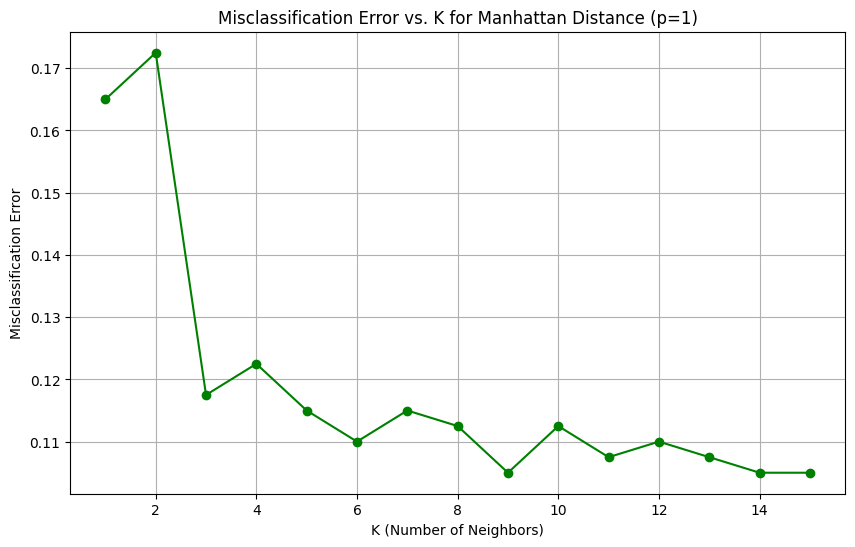

In [4]:
# Create a range of K values
k_values = range(1, 16)

# Initialize lists to store misclassification errors
misclassification_errors = []

# Iterate over each K value
for k in k_values:
    # Initialize KNN classifier with Manhattan distance
    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1)

    # Perform 5-fold cross-validation and calculate the misclassification error
    cross_val_results = cross_val_score(knn_classifier, X_scaled, Y, cv=5, scoring='accuracy')
    misclassification_error = 1 - np.mean(cross_val_results)

    # Append the misclassification error to the list
    misclassification_errors.append(misclassification_error)

# Plot misclassification error as a function of K
plt.figure(figsize=(10, 6))
plt.plot(k_values, misclassification_errors, color='green', marker='o', linestyle='-')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. K for Manhattan Distance (p=1)')
plt.grid(True)
plt.show()


**Answer:**

## 2.3

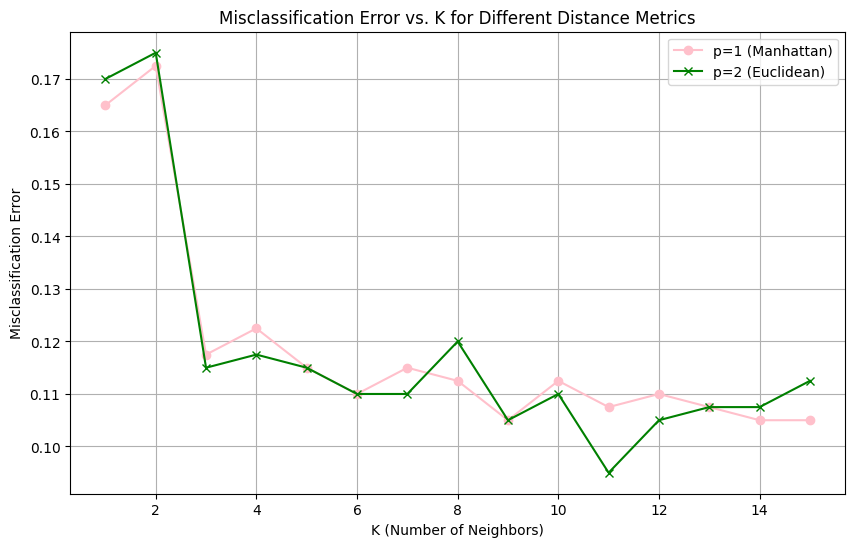

In [5]:
# Create a range of K values
k_values = range(1, 16)

# Initialize lists to store misclassification errors for p=1 and p=2
misclassification_errors_p1 = []
misclassification_errors_p2 = []

# Iterate over each K value
for k in k_values:
    # Initialize KNN classifier with Manhattan distance (p=1)
    knn_classifier_p1 = KNeighborsClassifier(n_neighbors=k, p=1)
    # Calculate misclassification error for p=1
    cross_val_results_p1 = cross_val_score(knn_classifier_p1, X_scaled, Y, cv=5, scoring='accuracy')
    misclassification_error_p1 = 1 - np.mean(cross_val_results_p1)

    # Append the misclassification error for p=1 to the list
    misclassification_errors_p1.append(misclassification_error_p1)

    # Initialize KNN classifier with Euclidean distance (p=2)
    knn_classifier_p2 = KNeighborsClassifier(n_neighbors=k, p=2)

    # Calculate misclassification error for p=2
    cross_val_results_p2 = cross_val_score(knn_classifier_p2, X_scaled, Y, cv=5, scoring='accuracy')
    misclassification_error_p2 = 1 - np.mean(cross_val_results_p2)

    # Append the misclassification error for p=2 to the list
    misclassification_errors_p2.append(misclassification_error_p2)

# Plot both misclassification errors for p=1 and p=2 in the same graph with labels
plt.figure(figsize=(10, 6))
plt.plot(k_values, misclassification_errors_p1, color='pink', marker='o', linestyle='-', label='p=1 (Manhattan)')
plt.plot(k_values, misclassification_errors_p2, color='green', marker='x', linestyle='-', label='p=2 (Euclidean)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. K for Different Distance Metrics')
plt.legend()  # Add the legend
plt.grid(True)
plt.show()

**Answer:**

## 2.4

In [10]:
# Find the index of the minimum misclassification error for p=1 (Manhattan)
optimal_k_p1 = k_values[np.argmin(misclassification_errors_p1)]
min_error_p1 = min(misclassification_errors_p1)

# Find the index of the minimum misclassification error for p=2 (Euclidean)
optimal_k_p2 = k_values[np.argmin(misclassification_errors_p2)]
min_error_p2 = min(misclassification_errors_p2)

print("Optimal K for Manhattan (p=1):", optimal_k_p1)
print("Misclassification Error for Manhattan (p=1):", min_error_p1)
print("Optimal K for Euclidean (p=2):", optimal_k_p2)
print("Misclassification Error for Euclidean (p=2):", min_error_p2)


Optimal K for Manhattan (p=1): 9
Misclassification Error for Manhattan (p=1): 0.1050000000000001
Optimal K for Euclidean (p=2): 11
Misclassification Error for Euclidean (p=2): 0.09500000000000008


**Answer:**

The optimal level of K with Euclidean distance is 11. This is not the same for the ManhattN distance which has an optimal K of 9. The value of K that gives the optimal mdoel is 11 because it has the smalled misclassification error.